In [158]:
import math
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Формула гаусової функції у двох вимірах. 
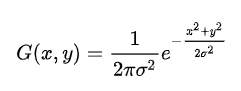

In [225]:
def kernel_gauss(radius,sigma):
    size = radius*2+1
    gausskernel = np.zeros((size,size),np.float32)
    for x in range (size):
        for y in range (size):
            gausskernel[x,y] = math.exp(-((x-radius)**2 + (y-radius)**2)/(2*sigma**2))/2*math.pi*sigma**2
    
    # Normalization
    sum = np.sum(gausskernel)
    kernel = gausskernel/sum 
    return kernel

Функція для множення ядра згортки на матрицю зображення. При множенні виникає проблема з краями, можна додати обгортку, або ігнорувати їх. У даній функції використовується другий варіант.

In [208]:
def multiplic_matr(img,kernel,i):
    h,w = img.shape
    k_h,k_w = kernel.shape
    
    #Progress bar
    pbar = tqdm(range(int(k_h/2),h-int(k_h/2)), desc="Progress "+str(i)+"/3 ", leave=False)
    
    for i in pbar:
        for j in range(int(k_h/2),w-int(k_h/2)):
            sum = 0
            for k in range(0,k_h):
                for l in range(0,k_h):
                    sum += img[i-int(k_h/2)+k,j-int(k_h/2)+l]*kernel[k,l]
            img[i,j] = sum
            
    return img

Функція яка розділяє зображення на 3(RGB). Обраховує множення ядра згортки на кожну матрицю і виводимо зображення.

In [209]:
def gauss_filter(img, radius, sigma):
    kernel = kernel_gauss(radius, sigma)
    output = img.copy()
    i = 0
    for img_ in cv2.split(img):
        output[:,:,i] = multiplic_matr(img_,kernel,i+1)
        i+=1
    #Show original and blur image
    plot_cv_img(img,output,radius, sigma)

Вивід оригінального та з застосуванням фільтра.

In [210]:
def plot_cv_img(input_image, output_image,r,sigma):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original', fontsize=24)
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Gaussian Blurred radius = '+str(r) + " sigma = "+str(sigma), fontsize=24)
    ax[1].axis('off')
    plt.show()

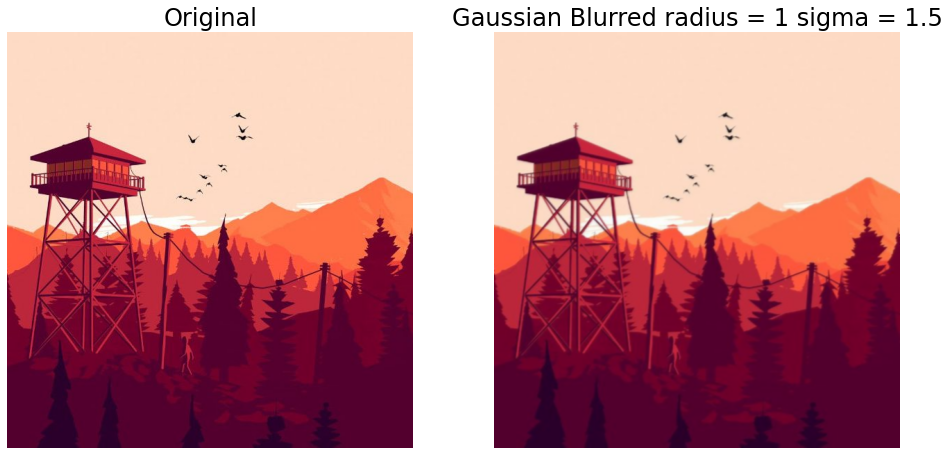

In [227]:
kernel = gauss_filter(img, 1, 1.5)

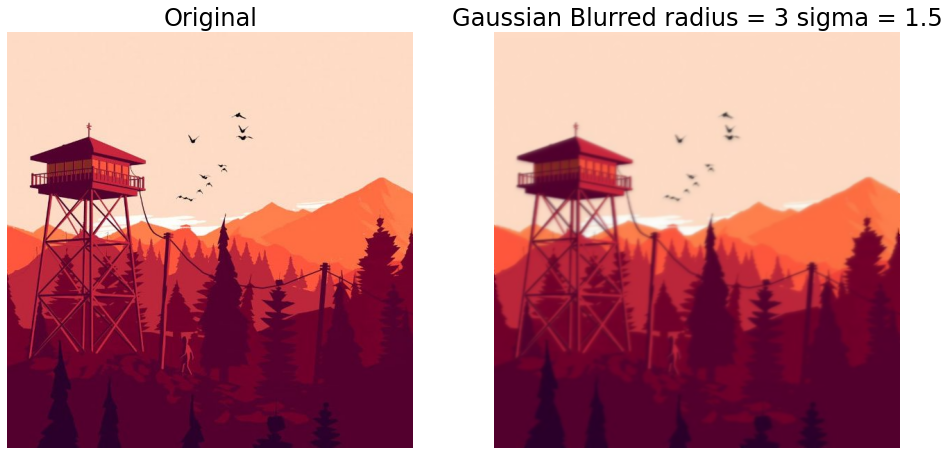

In [218]:
img = cv2.imread("img.jpg")

kernel = gauss_filter(img, 3, 1.5)

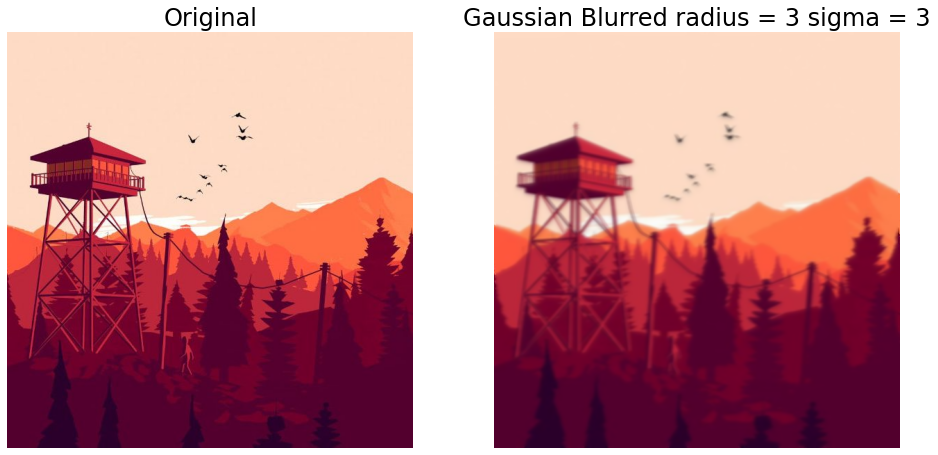

In [219]:
kernel = gauss_filter(img, 3, 3)

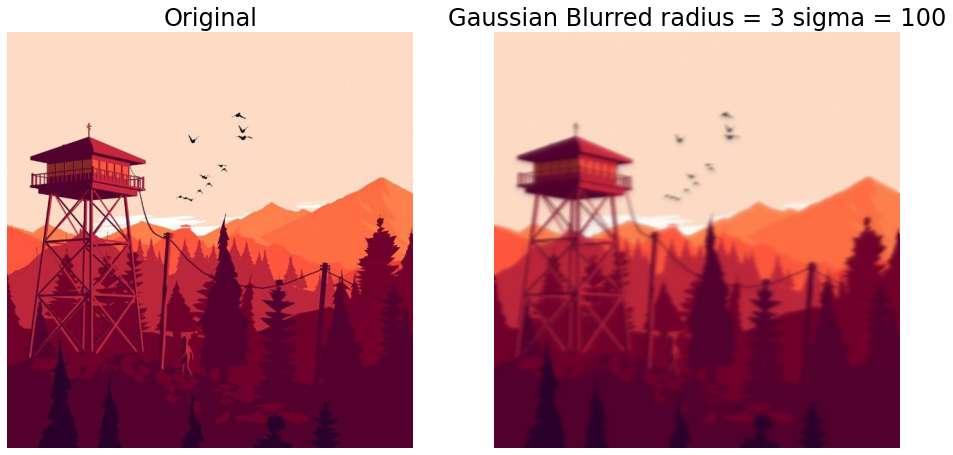

In [220]:
kernel = gauss_filter(img, 3, 100)

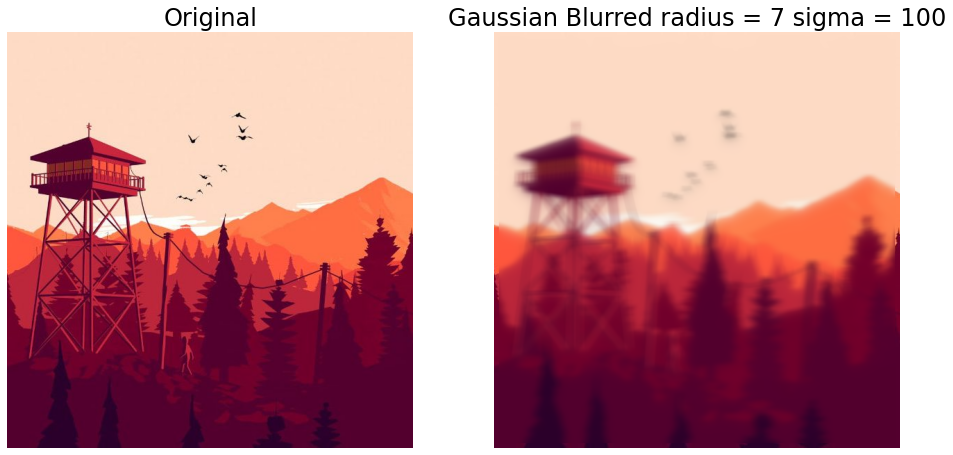

In [228]:
kernel = gauss_filter(img, 7, 100)